# Ejercicio 2

## Exploratory Data Analysis (EDA)

In [189]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

Imprimimos ahora las primeras 5 filas del data frame

In [190]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


El tamaño del data frame con el que trabajaremos será de:

In [191]:
print(df.shape)

(768, 9)


hacemos un .info para ver los datatypes y si hay celdas vacías

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Con la siguiente linea checkeamos efectivamente que no hay datos vacios para ninguna categoría

In [193]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Guardamos los dataframes de las personas con diabetes y de las personas sanas

In [194]:
D = df[(df['Outcome'] != 0)]
H = df[(df['Outcome'] == 0)]

Mostramos en un gráfico cuantos casos del data frame tienen diabetes y cuantos no:

In [195]:
healthy_people_num = (df['Outcome'] == 0).sum()
sick_people_num = (df['Outcome'] != 0).sum()
total = df.shape[0]
print(healthy_people_num)
print(sick_people_num)
print(total)

500
268
768


Poner gráfico para ver la diferencia


Vemos que el grupo de casos versus los no casos de diabetes no esta balanceado.


Luego podemos ver que hay muchos datos que tienen valor cero, y esto sabemos que no puede ser cierto, ya que por ejemplo una persona no puede tener presion arterial igual a cero.

In [196]:
import numpy as np

In [197]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

Ahora vemos cuantos casilleros son nulos para cada categoria

In [198]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Poner grafico aqui si tenemos ganas



Vemos que muchos datos son nulos, esto no es de mucha ayuda, si tuvieramos un set de datos grande podríamos prescindir de la fila, pero como nuestro set no es tan grande, veremos mas adelante como tratar esto datos.

Para obtener mas datos sobre el dataframe podemos utilizar el metodo describe

In [199]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [200]:
H.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [201]:
D.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


Anotar las correlaciones que podemos ver a ojo de esas tablas


Ahora con la informacion obtenida de los describe realizados para las personas sanas y las enfermas podemos modificar los valores nulos que vimos antes que exiten en nuestro dataframe por los valores medios dentro de cada una de las distribuciones, es decir, si a la persona que tiene diabetes le falta el parámetro insulina se reemplazará este parámetro por la media que tenga el conjunto de personas con diabetes, y lo mismo para las personas sanas.

In [250]:
def median_target(var):
    """
    This function print the mean values of the target passed for each outcome
    """   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby('Outcome')[[var]].median().reset_index()
    return temp

### Reemplazo de datos Nulos
#### Glucose

In [252]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [204]:
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 107
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 140

#### BloodPressure	

In [253]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [206]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70.0
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

#### SkinThickness

In [207]:
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [208]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27.0
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32.0

#### Insulin

In [209]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [210]:
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 107.0
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 140.0

#### BMI

In [211]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [212]:
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.1
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 34.3

#### DiabetesPedigreeFunction

In [213]:
median_target('DiabetesPedigreeFunction')

,Outcome,DiabetesPedigreeFunction
0,0,0.336
1,1,0.449


In [214]:
df.loc[(df['Outcome'] == 0 ) & (df['DiabetesPedigreeFunction'].isnull()), 'DiabetesPedigreeFunction'] = 0.336
df.loc[(df['Outcome'] == 1 ) & (df['DiabetesPedigreeFunction'].isnull()), 'DiabetesPedigreeFunction'] = 0.449

#### Age

In [215]:
median_target('Age')

,Outcome,Age
0,0,27
1,1,36


In [216]:
df.loc[(df['Outcome'] == 0 ) & (df['Age'].isnull()), 'Age'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['Age'].isnull()), 'Age'] = 36

Ahora comprobamos que efectivamente ya no tenemos valores nulos en nuestro data frame


In [217]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [218]:
import matplotlib.pyplot as plt

c:\Users\Usuario\Documents\ITBA\2021 1er cuatrimestre\Redes Neuronales\TPs\TP1\TP1Redes\Ejercicio2\ej2\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


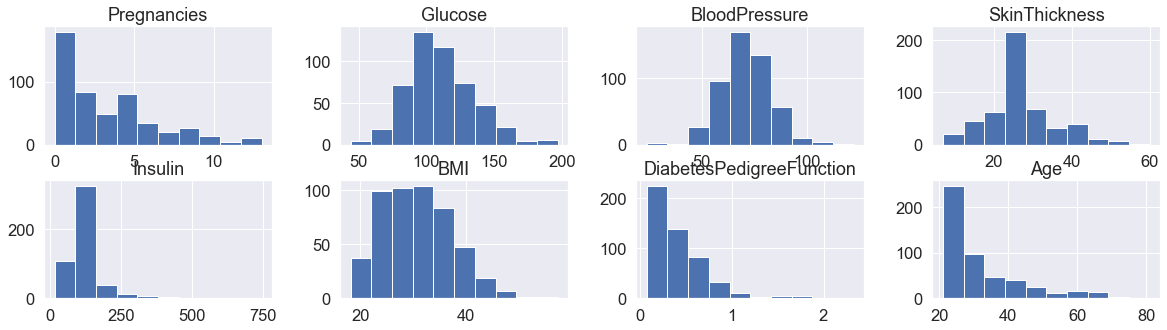

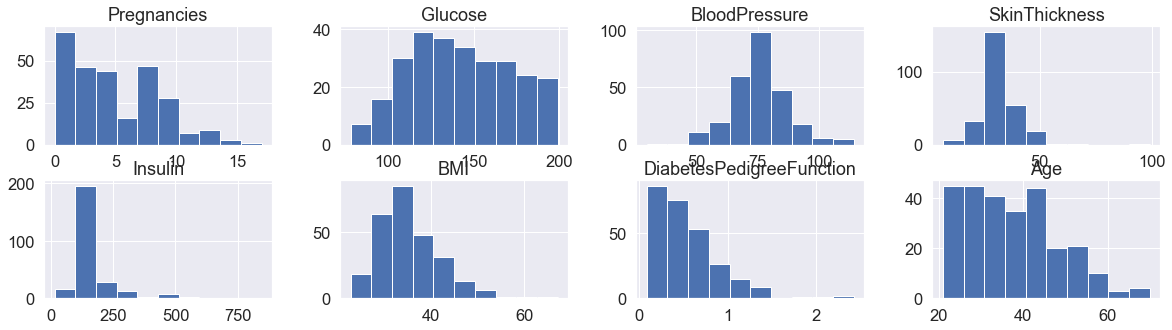

In [219]:
df.groupby('Outcome').hist(figsize=(20,5),layout=(2,4), column=['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])
plt.show()



Aca habria que poner alguna conclusion de los graficos

Ahora calcularemos la correlacion de los datos y graficar los valores

In [220]:
correlation = df.corr()

Para realizar el gráfico es necesario importar la libreria seaborn

In [221]:
import seaborn as sns

Veamos ahora la correlacion entre las variables con un grafico:


<AxesSubplot:>

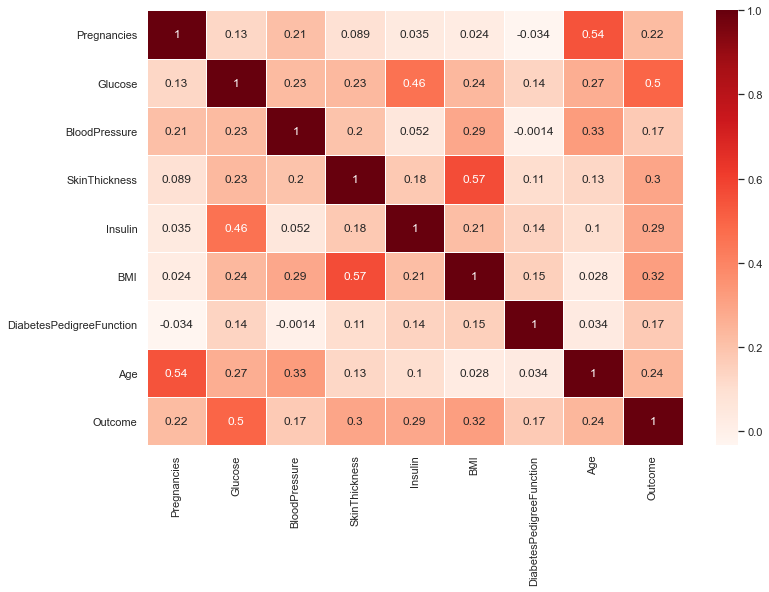

In [247]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(correlation,annot = True, linewidth=1, linecolor='w', cmap="Reds")

Conclusiones del grafico

Conclusiones del EDA

## Entrenamiento del Modelo

Como disponemos de un bajo numero de datos utilizamos k-folding para optimizar el uso de los mismos.

In [223]:
import math

def calculate_gaussian_likelihood(x, mean_std):
	mean = mean_std[0]
	stdev = mean_std[1]
	exponent = math.exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent

In [224]:
def calculate_mean_std(set_df, column, outcome):
    filtered_df = set_df[[column, 'Outcome']].groupby(['Outcome'])[[column]]
    mean = filtered_df.mean().reset_index().iloc[outcome,1]
    std = filtered_df.std().reset_index().iloc[outcome,1]
    return np.array([mean, std])

In [225]:
def train_model(train_df):
    train_matrix =  np.empty([2, len(train_df.columns)-1], dtype = object)
    for ind, column in enumerate(train_df.columns):
        if (ind != train_df.columns.get_loc("Outcome")):
            train_matrix[0][ind] = calculate_mean_std(train_df, train_df.columns[ind], 0)
            train_matrix[1][ind] = calculate_mean_std(train_df, train_df.columns[ind], 1)
    # print(train_matrix)
    return train_matrix

In [226]:
import math

def pred(row, matrix, priori_probs):
    #print(priori_probs)
    likelihoods_0 = np.array([])
    likelihoods_1 = np.array([])
    for ind, column in enumerate(row):
        if (ind != train_df.columns.get_loc("Outcome")):
            likelihoods_0 = np.append(likelihoods_0, math.log(calculate_gaussian_likelihood(column, matrix[0][ind])))
            likelihoods_1 = np.append(likelihoods_1, math.log(calculate_gaussian_likelihood(column, matrix[1][ind])))
    prob_0 = likelihoods_0.sum()
    prob_1 = likelihoods_1.sum()
    prob_0 += math.log(priori_probs[0])
    prob_1 += math.log(priori_probs[1])
    if(prob_1 >= prob_0):
        return 1.0
    else:
        return 0.0


In [227]:
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5)
sub_sets = kf.split(df)

conf_matrix = []

for train_index, test_index in sub_sets: 
    outcomes = []
    pred_outcomes = []
    train_df = df.iloc[train_index]
    test_df = df.iloc[test_index]
    healthy_p_train = (train_df['Outcome'] == 0).sum()
    sick_p_train = (train_df['Outcome'] != 0).sum()
    total = train_df.shape[0]
    priori_probs = [healthy_p_train / (healthy_p_train + sick_p_train), sick_p_train / (healthy_p_train + sick_p_train)]
    matrix_train = train_model(train_df)
    for index, row in test_df.iterrows():
        true_outcome = row["Outcome"]
        pred_outcome = pred(row, matrix_train, priori_probs)
        outcomes.append(true_outcome)
        pred_outcomes.append(pred_outcome)
    conf_matrix.append(metrics.confusion_matrix(outcomes, pred_outcomes))
print(conf_matrix)
        


[array([[84, 16],
       [21, 33]], dtype=int64), array([[73, 17],
       [27, 37]], dtype=int64), array([[81, 16],
       [23, 34]], dtype=int64), array([[97, 17],
       [10, 29]], dtype=int64), array([[85, 14],
       [22, 32]], dtype=int64)]


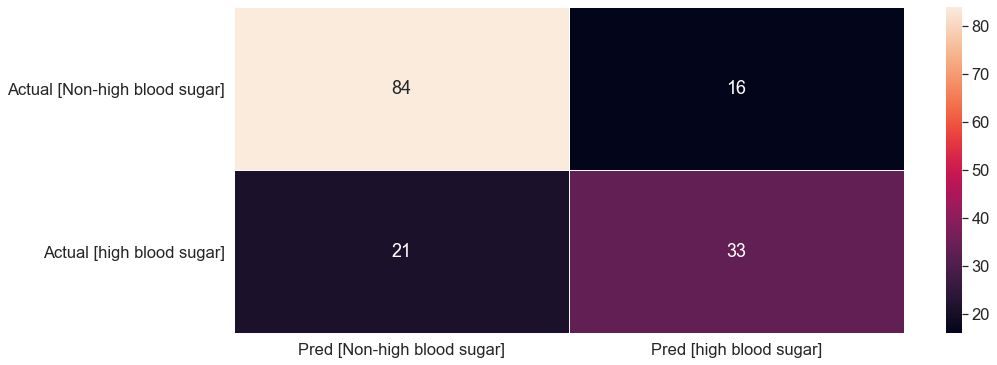

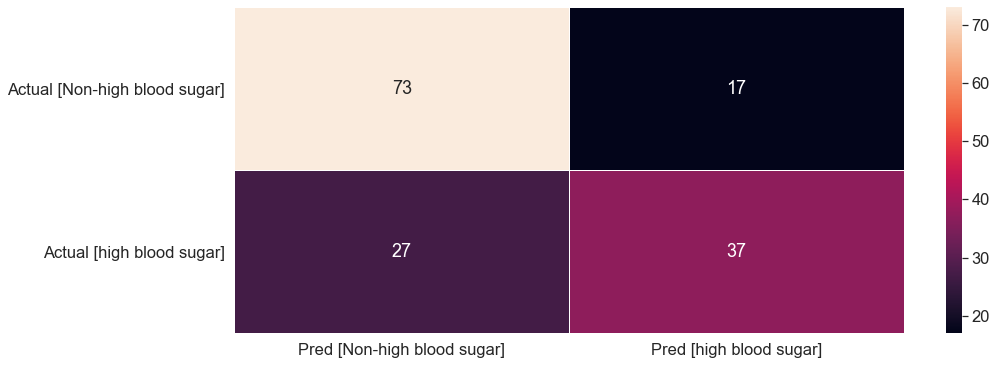

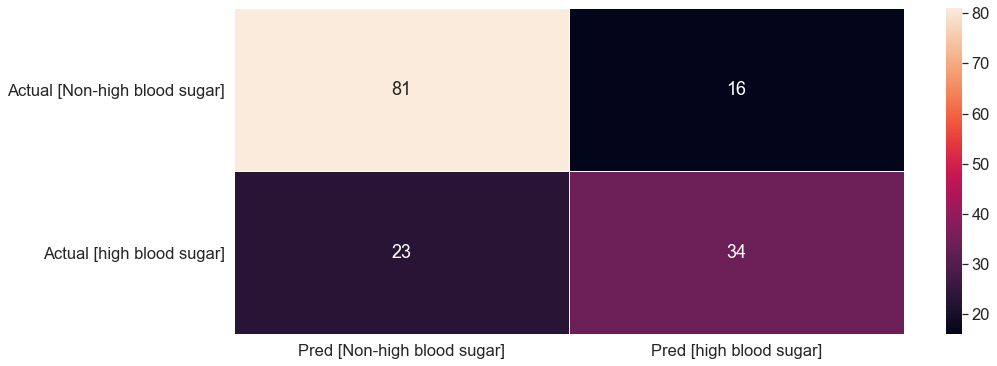

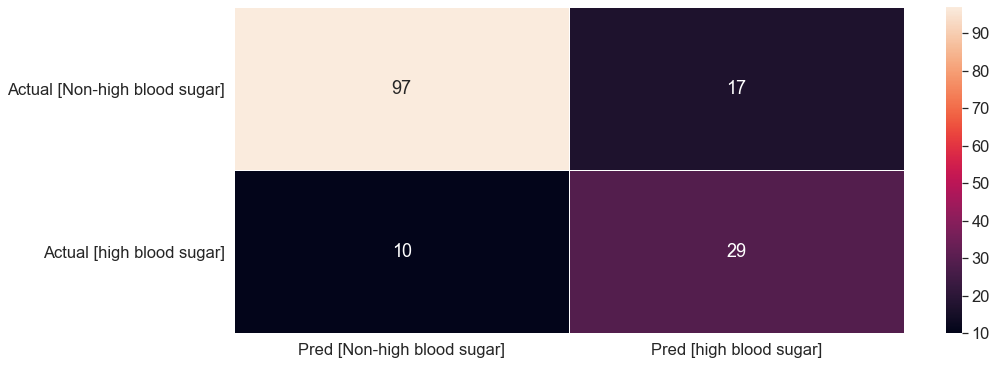

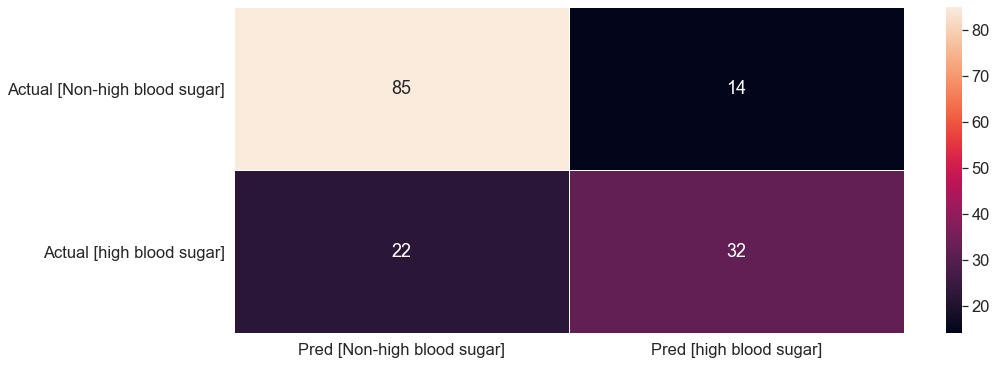

In [228]:
for matrix in conf_matrix:
    ylabel = ["Actual [Non-high blood sugar]","Actual [high blood sugar]"]
    xlabel = ["Pred [Non-high blood sugar]","Pred [high blood sugar]"]
    sns.set(font_scale = 1.5)
    plt.figure(figsize=(15,6))
    sns.heatmap(matrix, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='white', linewidths=1)

## Métricas

A continuación algunas de las métricas posibles para utilizar

*   **Sensibilidad** (Sensitivity): Es la habilidad del modelo de clasificar correctamente una muestra como positivo. 

  $Sensibilidad = \frac{VP}{(VP+FN)}$
  

*   **Especificidad** (Specificity): Es la habilidad del modelo de clasificar correctamente una muestra como negativo.

  $Especificidad = \frac{VN}{(VN+FP)}$


In [232]:
def get_sensitivity(conf_matrix):
    sensitivities = np.array([])    
    for matrix in conf_matrix:
        tn, fp, fn, tp = matrix.ravel()
        sensitivities = np.append(sensitivities,(tp/(tp+fn)))
    print(sensitivities)
    return sensitivities.sum()/len(sensitivities)
get_sensitivity(conf_matrix)

[0.61111111 0.578125   0.59649123 0.74358974 0.59259259]


0.6243819350727245

In [234]:
def get_specificity(conf_matrix):
    specificities = np.array([])    
    for matrix in conf_matrix:
        tn, fp, fn, tp = matrix.ravel()
        specificities = np.append(specificities,(tn/(tn+fp)))
    print(specificities)
    return specificities.sum()/len(specificities)
get_specificity(conf_matrix)

[0.84       0.81111111 0.83505155 0.85087719 0.85858586]


0.8391251418142357